# ***IMPORT LIBRARY***

In [ ]:
import pandas as pd
import math
import numpy as np
import gdown

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from sklearn.metrics import mean_absolute_error, mean_squared_error

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# ***DATASET***

## ***Dataset* Film**

In [ ]:
'''https://drive.google.com/file/d/17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl/view?usp=sharing'''

id = "17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl"
gdown.download(id=id, output="imdb.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl
To: /content/imdb.csv
100%|██████████| 1.54M/1.54M [00:00<00:00, 70.1MB/s]


'imdb.csv'

In [ ]:
df_film = pd.read_csv("imdb.csv")
df_film.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)
df_film

,type,name,url,poster,description,review,IMDB,contentRating,genre,datePublished,keywords,duration,actor,director,creator,RottenTomatoes Audience Score,RottenTomatoes Tomato Meter
0,Movie,14 Cameras,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMTk4OD...,When a family of five rent a beautiful house f...,"{'author': 'aprilsfriendorin', 'dateCreated': ...",2.30,TV-MA,"['Crime', 'Horror', 'Thriller']",2018-07-27,"tied feet,tied up while barefoot,tape over mou...",PT1H30M,"[{'name': 'Zach Dulin', 'url': 'https://www.im...","[{'name': 'Seth Fuller', 'url': 'https://www.i...","[{'name': 'Victor Zarcoff', 'url': 'https://ww...",1.10,1.10
1,Movie,17 Again,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMjA2NT...,0,"{'author': 'tavm', 'dateCreated': '2009-04-21'...",3.20,PG-13,"['Comedy', 'Drama', 'Fantasy']",2009-04-17,"body transformation,adult as child,high school...",PT1H42M,"[{'name': 'Zac Efron', 'url': 'https://www.imd...","[{'name': 'Burr Steers', 'url': 'https://www.i...","[{'name': 'Jason Filardi', 'url': 'https://www...",3.35,2.80
2,Movie,1BR,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BNDgxY2...,0,"{'author': 'aarpcats', 'dateCreated': '2022-01...",2.90,TV-MA,"['Drama', 'Horror', 'Thriller']",2020-04-24,"community,apartment building,submission,stockh...",PT1H30M,"[{'name': 'Nicole Brydon Bloom', 'url': 'https...","[{'name': 'David Marmor', 'url': 'https://www....","[{'name': 'David Marmor', 'url': 'https://www....",2.65,4.40
3,Movie,3 Days to Kill,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BYjE2Nm...,A dying CIA agent trying to reconnect with his...,"{'author': 'slightlymad22', 'dateCreated': '20...",3.10,PG-13,"['Action', 'Comedy', 'Drama']",2014-02-25,"spy,violence,dirty bomb,massacre,cough syrup",PT1H57M,"[{'name': 'Kevin Costner', 'url': 'https://www...","[{'name': 'McG', 'url': 'https://www.imdb.com/...","[{'name': 'Adi Hasak', 'url': 'https://www.imd...",2.15,1.40
4,Movie,3 Idiots,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BNTkyOG...,0,"{'author': 'lanacastillo49', 'dateCreated': '2...",4.20,13+,"['Comedy', 'Drama']",2009-12-25,"hairy chest,motivation,coming of age,against t...",PT2H50M,"[{'name': 'Aamir Khan', 'url': 'https://www.im...","[{'name': 'Rajkumar Hirani', 'url': 'https://w...","[{'name': 'Abhijat Joshi', 'url': 'https://www...",4.65,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,Movie,Zombieland,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMjIzND...,0,"{'author': 'Fella_shibby', 'dateCreated': '201...",3.80,D,"['Action', 'Comedy', 'Horror']",2009-10-02,"zombie,amusement park,human versus zombie,zomb...",PT1H28M,"[{'name': 'Jesse Eisenberg', 'url': 'https://w...","[{'name': 'Ruben Fleischer', 'url': 'https://w...","[{'name': 'Rhett Reese', 'url': 'https://www.i...",4.30,4.45
850,Movie,iNumber Number: Jozi Gold,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BM2RhYz...,When an undercover cop is tasked with investig...,"{'author': 'penofinspiratin', 'dateCreated': '...",2.20,0,"['Action', 'Adventure', 'Crime']",2023-06-23,"police procedural crime,team action",PT1H53M,"[{'name': 'Lonwabo Bokamoso', 'url': 'https://...","[{'name': 'Donovan Marsh', 'url': 'https://www...","[{'name': 'Donovan Marsh', 'url': 'https://www...",0.00,0.00
851,Movie,¡Que viva México!,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMDFiMD...,0,"{'author': 'cobo-3', 'dateCreated': '2023-03-2...",2.75,R,['Comedy'],2023-03-23,"female full frontal nudity,female nudity,femal...",PT3H11M,"[{'name': 'Damián Alcázar', 'url': 'https://ww...","[{'name': 'Luis Estrada', 'url': 'https://www....","[{'name': 'Luis Estrada', 'url': 'https://www....",0.00,1.45
852,Movie,¿Enco

## ***Dataset Rating***


In [ ]:
'''https://drive.google.com/file/d/1JMBs-PABg9mos8K3EA49HBbtH_1bKiYb/view?usp=sharing'''

id = "1JMBs-PABg9mos8K3EA49HBbtH_1bKiYb"
gdown.download(id=id, output="bert_sentiment_scores.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1JMBs-PABg9mos8K3EA49HBbtH_1bKiYb
To: /content/bert_sentiment_scores.csv
100%|██████████| 5.68M/5.68M [00:00<00:00, 54.8MB/s]


'bert_sentiment_scores.csv'

In [ ]:
df_rating = pd.read_csv("bert_sentiment_scores.csv")
df_rating

,title,username,Text,Sentiment,sentiment_score
0,Cargo,moviemenfes,this mvs is very sad nangiiis in this scene th...,Positive,4.976672
1,Layar,bicaraboxoffice,if for example there is one film that aired on...,Neutral,2.998256
2,What If,moviemenfes,mvs what if today? how come it s not in disney...,Neutral,1.004498
3,Layar,WatchmenID,for those who miss seeing arini on the big screen,Neutral,2.999633
4,Lightyear,ErikDavis,new trailer chris evans stars as buzz in a new...,Neutral,2.999340
...,...,...,...,...,...
33131,Rise,zavvi,the droids hold a special place in my heart an...,Positive,4.996857
33132,Rise,zavvi,okay campers rise and shine! this sunday at 7p...,Positive,4.996006
33133,Rise,zavvi,star wars episode ix the rise of skywalker zav...,Neutral,2.999873
33134,Seasons,zavvi,season 1 6 blu ray boxset only 69 99 in our !,Neutral,3.000320


In [ ]:
df_rating.describe()

,sentiment_score
count,33136.000000
mean,2.879889
std,1.869132
min,1.002817
25%,1.004068
50%,2.999288
75%,4.996725
max,4.997131


# ***PRE-PROCESSING DATASET RATING***

## ***Detect Outliers***

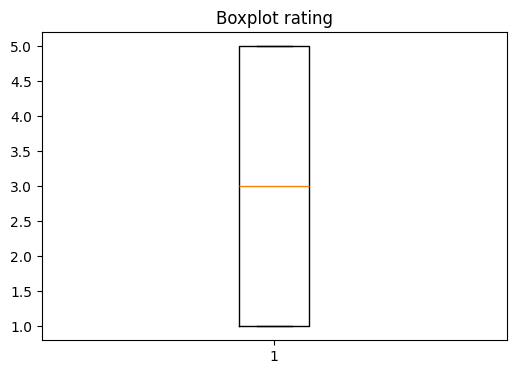

Outlier values:
Series([], Name: sentiment_score, dtype: float64)


In [ ]:
# mengecek outlier menggunakan z-score
plt.figure(figsize=(6, 4))
plt.boxplot(df_rating["sentiment_score"])
plt.title(f'Boxplot {"rating"}')
plt.show()

z_scores = stats.zscore(df_rating["sentiment_score"])
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
outlier_values = df_rating["sentiment_score"][outliers]

print("Outlier values:")
print(outlier_values)

## ***Set Columns***

In [ ]:
df_rating = df_rating.rename(columns={'username': 'nama_akun'})
df_rating = df_rating.rename(columns={'title': 'judul_film'})
df_rating = df_rating.rename(columns={'sentiment_score': 'rating'})

## ***Missing Value***

In [ ]:
print(df_rating.isnull().sum())

judul_film    0
nama_akun     0
Text          0
Sentiment     0
rating        0
dtype: int64


In [ ]:
df_rating

,judul_film,nama_akun,Text,Sentiment,rating
0,Cargo,moviemenfes,this mvs is very sad nangiiis in this scene th...,Positive,4.976672
1,Layar,bicaraboxoffice,if for example there is one film that aired on...,Neutral,2.998256
2,What If,moviemenfes,mvs what if today? how come it s not in disney...,Neutral,1.004498
3,Layar,WatchmenID,for those who miss seeing arini on the big screen,Neutral,2.999633
4,Lightyear,ErikDavis,new trailer chris evans stars as buzz in a new...,Neutral,2.999340
...,...,...,...,...,...
33131,Rise,zavvi,the droids hold a special place in my heart an...,Positive,4.996857
33132,Rise,zavvi,okay campers rise and shine! this sunday at 7p...,Positive,4.996006
33133,Rise,zavvi,star wars episode ix the rise of skywalker zav...,Neutral,2.999873
33134,Seasons,zavvi,season 1 6 blu ray boxset only 69 99 in our !,Neutral,3.000320


# ***TEMPLATE DATASET***

## ***Dataset* Kosong**

Berisi kolom yang akan diisi untuk hasil prediksi *rating* sistem rekomendasi.

In [ ]:
columns = []
columns.append('nama film')
accounts = df_rating.nama_akun.unique()
for account_index in range (0, len(accounts)):
  columns.append(accounts[account_index])

data_entries = []
films = df_film.name
for film_index in range (0, len(films)):
  data_entries.append({'nama film' : films[film_index]})

In [ ]:
df = pd.DataFrame(columns=columns)
df = pd.concat([df, pd.DataFrame(data_entries)], ignore_index=True)
df.fillna(0, inplace=True)

## ***Merging Dataset***

Penggabungan kolom pada *dataset* dengan cara mengambil data nama akun dan judul film sebagai kolom, serta *rating* sebagai *value*.

In [ ]:
for rating_index in range(len(df_rating)):
    df[df_rating["nama_akun"][rating_index]].loc[df["nama film"] == df_rating["judul_film"][rating_index]] = round(df_rating["rating"][rating_index],2)

df

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,14 Cameras,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,17 Again,1.01,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1BR,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0
3,3 Days to Kill,0.00,0.0,0.0,0.0,1.0,1.00,5.00,0.0,0.0,...,0.00,1.01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0
4,3 Idiots,5.00,0.0,1.0,0.0,0.0,0.00,4.98,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,Zombieland,1.00,0.0,5.0,0.0,1.0,2.98,5.00,5.0,0.0,...,1.01,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
850,iNumber Number: Jozi Gold,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
851,¡Que viva México!,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
852,¿Encontró lo que buscaba?,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# ***DATASET* SIAP OLAH**

## ***Sparsity Data***

Sparse data merujuk pada situasi di mana sebagian besar nilai dalam suatu dataset adalah nol

In [ ]:
jumlah_nilai_nol = (df.iloc[:, 1:] == 0).sum().sum()
jumlah_total = df.iloc[:, 1:].size
persentase_sparsity = (jumlah_nilai_nol / jumlah_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {jumlah_nilai_nol}")
print(f"Persentase sparsity: {persentase_sparsity:.2f}%")

Jumlah nilai 0 dalam dataset: 29781
Persentase sparsity: 89.42%


In [ ]:
def cek_nilai_nol(row):
    return len([value for value in row if value != 0])

df['Nilai Nol'] = df.apply(cek_nilai_nol, axis=1)
df_film['Nilai Nol'] = df['Nilai Nol']

df = df[df['Nilai Nol'] > 5]
df_film = df_film[df_film['Nilai Nol'] > 5]

df = df.drop('Nilai Nol', axis=1)
df = df.reset_index(drop=True)

df_film = df_film.drop('Nilai Nol', axis=1)
df_film = df_film.reset_index(drop=True)

df

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.00,0.0,0.0,0.0,1.00,1.00,5.00,0.00,0.00,...,0.00,1.01,0.0,0.00,3.0,0.0,0.00,0.00,0.00,0
1,3 Idiots,5.00,0.0,1.0,0.0,0.00,0.00,4.98,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0
2,5 Cowok Jagoan,0.00,1.0,0.0,0.0,0.00,5.00,5.00,4.99,0.00,...,0.00,0.00,0.0,0.00,0.0,5.0,0.00,0.00,0.00,0
3,6 Underground,1.00,3.0,0.0,0.0,4.59,5.00,0.00,1.00,0.00,...,0.00,1.00,0.0,0.00,0.0,5.0,0.00,0.00,0.00,0
4,65,1.01,1.0,5.0,1.0,1.00,4.99,3.00,1.00,1.00,...,5.00,5.00,5.0,1.02,5.0,1.0,1.01,0.00,1.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,1.00,0.0,0.0,5.0,0.00,0.00,0.00,0.00,2.11,...,0.00,0.00,0.0,1.30,0.0,0.0,1.00,0.00,0.00,1
271,Young Adult,0.00,0.0,0.0,0.0,0.00,5.00,1.00,5.00,0.00,...,0.00,1.00,0.0,0.00,1.0,0.0,0.00,0.00,0.00,0
272,Your Place or Mine,1.00,0.0,0.0,3.0,0.00,0.00,0.00,0.00,5.00,...,0.00,0.00,0.0,0.00,0.0,1.0,5.00,0.00,0.00,0
273,Zodiac,5.00,0.0,1.0,0.0,0.00,1.01,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.0,0.00,4.99,0.00,0


In [ ]:
# cek setelah di drop beberapa film
jumlah_nilai_nol = (df.iloc[:, 1:] == 0).sum().sum()
jumlah_total = df.iloc[:, 1:].size
persentase_sparsity = (jumlah_nilai_nol / jumlah_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {jumlah_nilai_nol}")
print(f"Persentase sparsity: {persentase_sparsity:.2f}%")

Jumlah nilai 0 dalam dataset: 7709
Persentase sparsity: 71.88%


## ***Data Normalization***

Menggunakan ***Min-Max Scaler*** untuk mengubah nilai-nilai dalam suatu fitur (*variabel*) sehingga rentang nilainya antara 0 hingga 1. Guna menghindari bias yang dapat timbul jika beberapa fitur memiliki skala yang jauh berbeda dalam data.

In [ ]:
df_normalized = df.copy()

scaler = MinMaxScaler()
columns = df.columns[1:]
df_normalized[columns] = scaler.fit_transform(df_normalized[columns])

df_normalized

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.000,0.0,0.0,0.0,0.200,0.200,1.000,0.000,0.000,...,0.000,0.202,0.0,0.000,0.6,0.0,0.000,0.000,0.000,0.0
1,3 Idiots,1.000,0.0,0.2,0.0,0.000,0.000,0.996,0.000,0.000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.0
2,5 Cowok Jagoan,0.000,0.2,0.0,0.0,0.000,1.000,1.000,0.998,0.000,...,0.000,0.000,0.0,0.000,0.0,1.0,0.000,0.000,0.000,0.0
3,6 Underground,0.200,0.6,0.0,0.0,0.918,1.000,0.000,0.200,0.000,...,0.000,0.200,0.0,0.000,0.0,1.0,0.000,0.000,0.000,0.0
4,65,0.202,0.2,1.0,0.2,0.200,0.998,0.600,0.200,0.200,...,1.000,1.000,1.0,0.204,1.0,0.2,0.202,0.000,0.204,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,0.200,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.422,...,0.000,0.000,0.0,0.260,0.0,0.0,0.200,0.000,0.000,1.0
271,Young Adult,0.000,0.0,0.0,0.0,0.000,1.000,0.200,1.000,0.000,...,0.000,0.200,0.0,0.000,0.2,0.0,0.000,0.000,0.000,0.0
272,Your Place or Mine,0.200,0.0,0.0,0.6,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.0,0.000,0.0,0.2,1.000,0.000,0.000,0.0
273,Zodiac,1.000,0.0,0.2,0.0,0.000,0.202,0.000,0.000,0.000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.998,0.000,0.0


## ***Transposing Dataset***

In [ ]:
df_transposed = df_normalized.set_index('nama film').T
df_transposed

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000,1.000,0.000,0.200,0.202,0.200,1.000,0.200,1.000,0.0,...,0.200,0.200,0.204,0.200,1.0,0.200,0.0,0.200,1.000,0.200
bicaraboxoffice,0.000,0.000,0.200,0.600,0.200,0.000,0.000,0.202,0.000,0.2,...,0.200,0.600,0.204,0.000,0.0,0.000,0.0,0.000,0.000,0.000
WatchmenID,0.000,0.200,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.0,...,1.000,1.000,0.000,0.000,0.6,0.000,0.0,0.000,0.200,1.000
ErikDavis,0.000,0.000,0.000,0.000,0.200,0.000,0.000,1.000,0.000,0.0,...,0.000,0.200,0.000,0.000,0.0,1.000,0.0,0.600,0.000,0.000
arulfittron,0.200,0.000,0.000,0.918,0.200,0.000,0.202,0.000,0.000,0.2,...,0.000,0.000,0.000,0.000,1.0,0.000,0.0,0.000,0.000,0.200
GilaFilmID,0.200,0.000,1.000,1.000,0.998,0.000,0.000,0.200,1.000,0.6,...,0.200,0.688,1.000,1.000,0.0,0.000,1.0,0.000,0.202,0.596
TarizSolis,1.000,0.996,1.000,0.000,0.600,0.000,0.000,1.000,1.000,0.6,...,1.000,0.000,1.000,0.000,0.0,0.000,0.2,0.000,0.000,1.000
djaycoholyc,0.000,0.000,0.998,0.200,0.200,0.600,0.000,1.000,0.200,0.2,...,0.000,0.200,1.000,0.000,1.0,0.000,1.0,0.000,0.000,1.000
akstanwyck,0.000,0.000,0.000,0.000,0.200,0.000,0.000,0.200,0.000,0.0,...,0.000,0.992,0.000,0.000,0.0,0.422,0.0,1.000,0.000,0.000
slashfilm,0.000,0.000,0.000,0.000,0.200,0.000,0.000,0.200,0.000,0.0,...,0.600,0.202,0.000,0.000,0.0,1.000,0.0,0.200,0.000,0.000


In [ ]:
# # dataset siap olah
# df_transposed.to_excel("Dataset_Siap_Olah.xlsx", index=True)

# **DISTRIBUSI DATA**

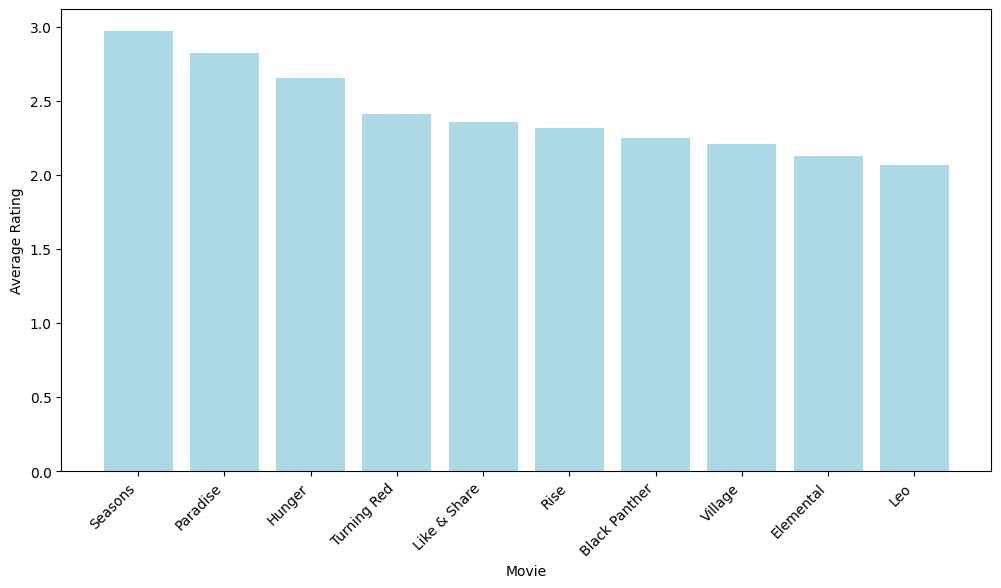

In [ ]:
data = df.copy()
# data = data.replace(0, np.NAN)

data["average"] = data.iloc[:, 1:].mean(axis=1)
data = data.sort_values("average", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(data["nama film"][:10], data["average"][:10], color='lightblue')
plt.xlabel("Movie")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.show()

# ***COLLABORATIVE FILTERING***

In [ ]:
df_cf = df_transposed.copy()
df_cf

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000,1.000,0.000,0.200,0.202,0.200,1.000,0.200,1.000,0.0,...,0.200,0.200,0.204,0.200,1.0,0.200,0.0,0.200,1.000,0.200
bicaraboxoffice,0.000,0.000,0.200,0.600,0.200,0.000,0.000,0.202,0.000,0.2,...,0.200,0.600,0.204,0.000,0.0,0.000,0.0,0.000,0.000,0.000
WatchmenID,0.000,0.200,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.0,...,1.000,1.000,0.000,0.000,0.6,0.000,0.0,0.000,0.200,1.000
ErikDavis,0.000,0.000,0.000,0.000,0.200,0.000,0.000,1.000,0.000,0.0,...,0.000,0.200,0.000,0.000,0.0,1.000,0.0,0.600,0.000,0.000
arulfittron,0.200,0.000,0.000,0.918,0.200,0.000,0.202,0.000,0.000,0.2,...,0.000,0.000,0.000,0.000,1.0,0.000,0.0,0.000,0.000,0.200
GilaFilmID,0.200,0.000,1.000,1.000,0.998,0.000,0.000,0.200,1.000,0.6,...,0.200,0.688,1.000,1.000,0.0,0.000,1.0,0.000,0.202,0.596
TarizSolis,1.000,0.996,1.000,0.000,0.600,0.000,0.000,1.000,1.000,0.6,...,1.000,0.000,1.000,0.000,0.0,0.000,0.2,0.000,0.000,1.000
djaycoholyc,0.000,0.000,0.998,0.200,0.200,0.600,0.000,1.000,0.200,0.2,...,0.000,0.200,1.000,0.000,1.0,0.000,1.0,0.000,0.000,1.000
akstanwyck,0.000,0.000,0.000,0.000,0.200,0.000,0.000,0.200,0.000,0.0,...,0.000,0.992,0.000,0.000,0.0,0.422,0.0,1.000,0.000,0.000
slashfilm,0.000,0.000,0.000,0.000,0.200,0.000,0.000,0.200,0.000,0.0,...,0.600,0.202,0.000,0.000,0.0,1.000,0.0,0.200,0.000,0.000


## **Fungsi Mencari Rata-Rata dan Top N**

In [ ]:
# menghitung rata-rata
def average(df, film_name):
    """Calculates the average rating for a given film in a transposed DataFrame."""
    if film_name in df.columns:
        ratings = df[film_name]
        # Filter out non-zero ratings
        valid_ratings = ratings[ratings != 0]
        if not valid_ratings.empty:
            return round(valid_ratings.mean(), 2)
    return 0

In [ ]:
# mencari top n
def top_n(n, df, col):
    top_values = df[col].nlargest(n)
    return top_values

# ***USER-BASED***

In [ ]:
print(df_transposed.columns)

Index(['3 Days to Kill', '3 Idiots', '5 Cowok Jagoan', '6 Underground', '65',
       'A Classic Horror Story', 'A Ghost Story', 'A Man Called Otto',
       'A Perfect Fit', 'A Wrinkle in Time',
       ...
       'Weathering', 'What If', 'Why Do You Love Me', 'Wind River',
       'Wish Dragon', 'You People', 'Young Adult', 'Your Place or Mine',
       'Zodiac', 'Zombieland'],
      dtype='object', name='nama film', length=275)


In [ ]:
user_based_df = df_normalized.copy()
temp = df_transposed
target = df_cf.copy()

for i in range(len(user_based_df)):
    for j in range(len(temp.index)): # Corrected: Iterate over the index of temp
        if (user_based_df[temp.index[j]][i] != 0): # Corrected: Access movie name from the index
            user_based_df[temp.index[j]][i] -= average(target,user_based_df['nama film'][i])
user_based_df

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.000,0.00,0.00,0.00,-0.340,-0.340,0.460,0.000,0.000,...,0.000,-0.338,0.00,0.000,0.06,0.00,0.000,0.000,0.000,0.00
1,3 Idiots,0.530,0.00,-0.27,0.00,0.000,0.000,0.526,0.000,0.000,...,0.000,0.000,0.00,0.000,0.00,0.00,0.000,0.000,0.000,0.00
2,5 Cowok Jagoan,0.000,-0.67,0.00,0.00,0.000,0.130,0.130,0.128,0.000,...,0.000,0.000,0.00,0.000,0.00,0.13,0.000,0.000,0.000,0.00
3,6 Underground,-0.390,0.01,0.00,0.00,0.328,0.410,0.000,-0.390,0.000,...,0.000,-0.390,0.00,0.000,0.00,0.41,0.000,0.000,0.000,0.00
4,65,-0.248,-0.25,0.55,-0.25,-0.250,0.548,0.150,-0.250,-0.250,...,0.550,0.550,0.55,-0.246,0.55,-0.25,-0.248,0.000,-0.246,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,-0.310,0.00,0.00,0.49,0.000,0.000,0.000,0.000,-0.088,...,0.000,0.000,0.00,-0.250,0.00,0.00,-0.310,0.000,0.000,0.49
271,Young Adult,0.000,0.00,0.00,0.00,0.000,0.440,-0.360,0.440,0.000,...,0.000,-0.360,0.00,0.000,-0.36,0.00,0.000,0.000,0.000,0.00
272,Your Place or Mine,-0.540,0.00,0.00,-0.14,0.000,0.000,0.000,0.000,0.260,...,0.000,0.000,0.00,0.000,0.00,-0.54,0.260,0.000,0.000,0.00
273,Zodiac,0.270,0.00,-0.53,0.00,0.000,-0.528,0.000,0.000,0.000,...,0.000,0.000,0.00,0.000,0.00,0.00,0.000,0.268,0.000,0.00


## ***Cosine Similarity***

In [ ]:
# Mengambil kolom dengan nilai-nilai rating
rating_matrix2 = user_based_df.iloc[:, 1:]
sim_user = cosine_similarity(rating_matrix2.T)

sim_user_cs = pd.DataFrame(sim_user, index=user_based_df.iloc[:, 1:].columns, columns=user_based_df.iloc[:, 1:].columns)
sim_user_cs

,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,slashfilm,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
moviemenfes,1.000000,-0.003422,-0.164718,-0.072910,-0.073709,-0.054244,0.039860,-0.015543,-0.092062,0.015649,...,0.000076,-0.131261,-0.020843,-0.096717,-0.026948,-0.070546,-0.017817,-0.151836,-0.085964,-0.005038
bicaraboxoffice,-0.003422,1.000000,-0.004385,-0.134546,-0.023300,-0.045199,0.020454,-0.033296,-0.080192,0.086277,...,-0.042861,-0.092522,-0.155189,-0.127310,-0.039859,-0.014645,0.097108,0.110475,0.037028,-0.068877
WatchmenID,-0.164718,-0.004385,1.000000,0.037111,-0.044544,-0.128592,-0.086832,-0.000289,0.092109,-0.172295,...,0.029192,0.044159,-0.030993,0.017617,-0.013539,-0.191751,-0.041651,-0.039028,0.013765,-0.004827
ErikDavis,-0.072910,-0.134546,0.037111,1.000000,0.057379,-0.013737,0.011449,-0.108361,0.258821,0.047316,...,-0.027464,-0.061836,-0.036235,0.000796,-0.139558,0.121988,0.161836,0.000000,-0.100132,0.306358
arulfittron,-0.073709,-0.023300,-0.044544,0.057379,1.000000,-0.022652,-0.111555,-0.176342,-0.025037,-0.032679,...,-0.046529,0.017349,-0.075585,-0.083761,-0.099627,0.171731,-0.015644,0.010052,0.086303,-0.067480
GilaFilmID,-0.054244,-0.045199,-0.128592,-0.013737,-0.022652,1.000000,-0.058623,0.046783,0.017985,-0.202780,...,-0.117953,-0.049819,0.010007,-0.111950,0.047644,-0.006806,0.026460,-0.127342,-0.037717,-0.008317
TarizSolis,0.039860,0.020454,-0.086832,0.011449,-0.111555,-0.058623,1.000000,-0.092641,-0.103460,-0.016636,...,-0.071096,-0.099150,-0.067217,0.017333,-0.029606,-0.081673,0.070431,-0.090433,-0.063009,0.053095
djaycoholyc,-0.015543,-0.033296,-0.000289,-0.108361,-0.176342,0.046783,-0.092641,1.000000,-0.083101,-0.032511,...,-0.089262,-0.006780,0.048414,-0.128312,-0.072096,-0.156456,-0.125857,-0.101610,0.040120,-0.064949
akstanwyck,-0.092062,-0.080192,0.092109,0.258821,-0.025037,0.017985,-0.103460,-0.083101,1.000000,0.057659,...,-0.172514,-0.029681,-0.089135,0.210172,-0.044676,-0.020362,0.190230,0.000000,0.121281,-0.127234
slashfilm,0.015649,0.086277,-0.172295,0.047316,-0.032679,-0.202780,-0.016636,-0.032511,0.057659,1.000000,...,0.043025,0.024893,0.013101,0.268270,-0.012974,0.014999,-0.164429,0.000000,0.093099,0.051553


### **Mencari *Top N***

Menampilkan Top Film berdasarkan nilai *similarity* hasil dari ***cosine similarity***

In [ ]:
def cek_topN_user(nama_akun):
    print('Pengguna yang mirip dengan Akun "{}" adalah:\n'.format(nama_akun))

    # mengurutkan film berdasarkan similarity
    similar_acc = sim_user_cs.sort_values(by=nama_akun, ascending=False).index[1:11]

    for rank, similar_acc in enumerate(similar_acc, start=1):
        # nilai similarity
        similarity_score = sim_user_cs.loc[similar_acc, nama_akun]
        print("No. {}: Akun {} (Score: {:.4f})".format(rank, similar_acc, similarity_score))

In [ ]:
akun = "moviemenfes"
cek_topN_user(akun)

Pengguna yang mirip dengan Akun "moviemenfes" adalah:

No. 1: Akun HabisNontonFilm (Score: 0.1159)
No. 2: Akun eug (Score: 0.0699)
No. 3: Akun TarizSolis (Score: 0.0399)
No. 4: Akun kampusfilmID (Score: 0.0267)
No. 5: Akun sir_amirsyarif (Score: 0.0246)
No. 6: Akun rayculz (Score: 0.0185)
No. 7: Akun KermodeMovie (Score: 0.0173)
No. 8: Akun sinema911 (Score: 0.0169)
No. 9: Akun slashfilm (Score: 0.0156)
No. 10: Akun moviegoersID (Score: 0.0070)


## ***FIND OPTIMAL $N$***

In [ ]:
rating_df_ub = df_transposed
target = df_normalized.copy()

# inisialisasi array untuk menyimpan ukuran sampel, RMSE, dan MAE
sample_arr2 = []
rmse_user_cs = []
mae_user_cs = []

for n in range(2, 41):
    sample = n
    prediction_df = df_normalized.copy()

    original_rating = np.array([])
    predicted_rating = np.array([])

    # iterasi setiap pengguna di df target
    for i in range(len(prediction_df)):
        # user similarity
        # Corrected: Iterate through the columns of prediction_df (user names)
        for user_col in prediction_df.columns[1:]:
            # Check if the user has rated the movie
            if (prediction_df[user_col][i] != 0):

                numerator = 0
                denominator = 0
                # Top N similar users
                tmp = top_n(sample, sim_user_cs, user_col)

                # top N similar users
                for k in range(len(tmp)):
                    if (tmp.index[k] != user_col):
                        # update numerator dan denominator
                        numerator += (user_based_df[tmp.index[k]][i]) * tmp.iloc[k]
                        denominator += tmp.iloc[k]

                if(denominator != 0):
                    # update user and film
                    # Corrected: Use the modified average function with the transposed df and film name
                    prediction_df[user_col][i] = average(rating_df_ub, prediction_df['nama film'][i]) + (numerator / denominator)

        # iterasi setiap prediksi rating
        # Corrected: Iterate over film names in the original df_normalized
        for film_name in df_normalized.columns[1:]:
            if(prediction_df[film_name][i] != 0):
                predicted_rating = np.append(predicted_rating, prediction_df[film_name][i])
                original_rating = np.append(original_rating, df_normalized[film_name][i])


    rmse_user_cs.append(round(math.sqrt(np.mean((predicted_rating - original_rating) ** 2)), 4))
    mae_user_cs.append(round(np.mean(np.abs(predicted_rating - original_rating)), 4))
    sample_arr2.append(sample)

In [ ]:
for i in range(len(sample_arr2)):
    print(f"Nilai N: {sample_arr2[i]}, RMSE: {rmse_user_cs[i]}, MAE: {mae_user_cs[i]}")

Nilai N: 2, RMSE: 0.364, MAE: 0.2877
Nilai N: 3, RMSE: 0.3399, MAE: 0.287
Nilai N: 4, RMSE: 0.3337, MAE: 0.2883
Nilai N: 5, RMSE: 0.3313, MAE: 0.2889
Nilai N: 6, RMSE: 0.3299, MAE: 0.2893
Nilai N: 7, RMSE: 0.3294, MAE: 0.2899
Nilai N: 8, RMSE: 0.329, MAE: 0.2906
Nilai N: 9, RMSE: 0.329, MAE: 0.2912
Nilai N: 10, RMSE: 0.3289, MAE: 0.2917
Nilai N: 11, RMSE: 0.329, MAE: 0.292
Nilai N: 12, RMSE: 0.3291, MAE: 0.2923
Nilai N: 13, RMSE: 0.3291, MAE: 0.2925
Nilai N: 14, RMSE: 0.3292, MAE: 0.2926
Nilai N: 15, RMSE: 0.3292, MAE: 0.2926
Nilai N: 16, RMSE: 0.3292, MAE: 0.2923
Nilai N: 17, RMSE: 0.329, MAE: 0.2919
Nilai N: 18, RMSE: 0.329, MAE: 0.2914
Nilai N: 19, RMSE: 0.3288, MAE: 0.2906
Nilai N: 20, RMSE: 0.3288, MAE: 0.2895
Nilai N: 21, RMSE: 0.3294, MAE: 0.288
Nilai N: 22, RMSE: 0.3322, MAE: 0.2876
Nilai N: 23, RMSE: 0.3529, MAE: 0.2951
Nilai N: 24, RMSE: 1.2981, MAE: 0.4921
Nilai N: 25, RMSE: 0.3937, MAE: 0.3145
Nilai N: 26, RMSE: 1.9596, MAE: 0.762
Nilai N: 27, RMSE: 1.4304, MAE: 0.6301
Nila

In [ ]:
min_rmse_index = np.argmin(rmse_user_cs)
min_mae_index = np.argmin(mae_user_cs)

print(f"Pada nilai N = {sample_arr2[min_rmse_index]}, mendapatkan:")
print(f"   - Nilai RMSE minimum = {rmse_user_cs[min_rmse_index]}")
print(f"   - Nilai MAE minimum  = {mae_user_cs[min_mae_index]}")

Pada nilai N = 19, mendapatkan:
   - Nilai RMSE minimum = 0.3288
   - Nilai MAE minimum  = 0.287


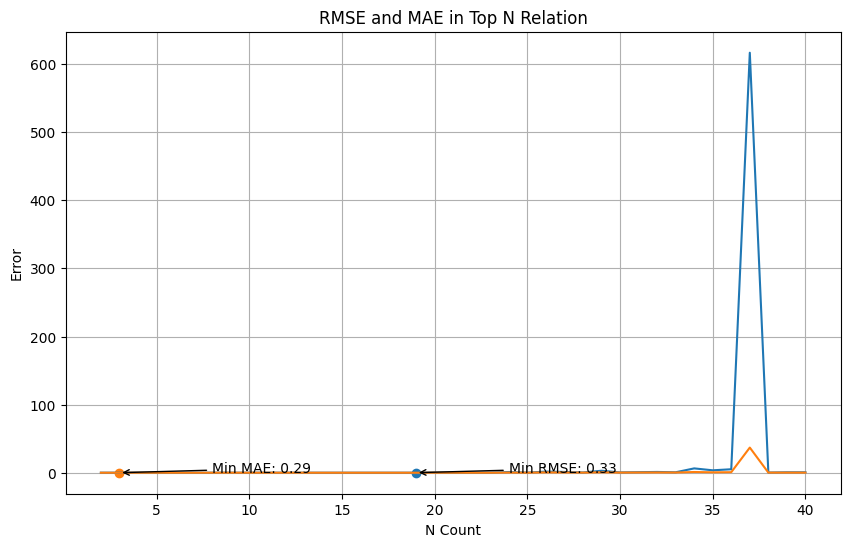

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sample_arr2, rmse_user_cs, label='RMSE')
plt.plot(sample_arr2, mae_user_cs, label='MAE')
plt.scatter(sample_arr2[min_rmse_index], rmse_user_cs[min_rmse_index], marker='o', label='Min RMSE')
plt.scatter(sample_arr2[min_mae_index], mae_user_cs[min_mae_index], marker='o', label='Min MAE')

plt.annotate(f'Min RMSE: {rmse_user_cs[min_rmse_index]:.2f}',
             xy=(sample_arr2[min_rmse_index], rmse_user_cs[min_rmse_index]),
             xytext=(sample_arr2[min_rmse_index] + 5, rmse_user_cs[min_rmse_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'Min MAE: {mae_user_cs[min_mae_index]:.2f}',
             xy=(sample_arr2[min_mae_index], mae_user_cs[min_mae_index]),
             xytext=(sample_arr2[min_mae_index] + 5, mae_user_cs[min_mae_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('N Count')
plt.ylabel('Error')
plt.title('RMSE and MAE in Top N Relation')
plt.grid(True)
plt.show()

## ***PREDICT RATING***

In [ ]:
n = 19
df_pred_ub = df_normalized.copy()

# prediksi
for i in range(len(df_pred_ub)):
    # similarity
    # Corrected: Iterate through the columns of df_pred_ub (user names)
    for user_col in df_pred_ub.columns[1:]:
        # memeriksa apakah nilai sama dengan 0
        if (df_pred_ub[user_col][i] == 0):

            numerator = 0
            denominator = 0

            tmp = top_n(n, sim_user_cs, user_col)
            for k in range(len(tmp)):
                if tmp.index[k] != user_col:

                    numerator += ((user_based_df[tmp.index[k]][i]) * tmp.iloc[k])
                    denominator += tmp.iloc[k]

            if denominator != 0 :
                # update nilai prediksi
                df_pred_ub[user_col][i] = average(df_transposed, df_pred_ub['nama film'][i]) + (numerator/denominator)
df_pred_ub

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.607676,0.563935,0.525352,0.531626,0.200000,0.200000,1.000000,0.520824,0.546799,...,0.593495,0.202000,0.544485,0.556616,0.600000,0.470111,0.561103,0.557968,0.523797,0.555716
1,3 Idiots,1.000000,0.488743,0.200000,0.467490,0.470000,0.470000,0.996000,0.454613,0.456906,...,0.426253,0.383873,0.429696,0.458790,0.451076,0.468012,0.458576,0.445033,0.446625,0.486807
2,5 Cowok Jagoan,0.890473,0.200000,0.888524,0.880891,0.933552,1.000000,1.000000,0.998000,0.869770,...,0.879438,0.900760,0.890757,0.871455,0.906776,1.000000,0.835979,0.740174,0.862474,0.879872
3,6 Underground,0.200000,0.600000,0.567639,0.633218,0.918000,1.000000,0.607717,0.200000,0.583148,...,0.602236,0.200000,0.577200,0.590005,0.578543,1.000000,0.614739,0.673796,0.644123,0.610681
4,65,0.202000,0.200000,1.000000,0.200000,0.200000,0.998000,0.600000,0.200000,0.200000,...,1.000000,1.000000,1.000000,0.204000,1.000000,0.200000,0.202000,0.446345,0.204000,0.457413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,0.200000,0.526115,0.551812,1.000000,0.543805,0.499919,0.376339,0.390192,0.422000,...,0.483448,0.556020,0.610300,0.260000,0.397556,0.562400,0.200000,0.464317,0.468068,1.000000
271,Young Adult,0.711720,0.660522,0.541497,0.557791,0.539369,1.000000,0.200000,1.000000,0.569243,...,0.492021,0.200000,0.548345,0.549630,0.200000,0.538564,0.542719,0.507354,0.574102,0.550933
272,Your Place or Mine,0.200000,0.725172,0.823615,0.600000,0.545874,0.856361,0.616708,0.781328,1.000000,...,0.779466,0.783803,0.831060,0.634142,0.706069,0.200000,1.000000,0.745183,0.734802,0.742516
273,Zodiac,1.000000,0.819555,0.200000,0.717651,0.787465,0.202000,0.775908,0.712406,0.686506,...,0.716710,0.747465,0.764729,0.722390,0.706937,0.778199,0.726842,0.998000,0.742983,0.730722


***SAVING DATAFRAME***

In [ ]:
df_pred_ub.to_excel("ResultCF_UB.xlsx")

In [ ]:
from google.colab import files
files.download("ResultCF_UB.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ***EVALUATION***

In [ ]:
df_actualub= df_normalized.copy()
df_predub = pd.read_excel("ResultCF_UB.xlsx")
df_predub = df_predub.drop("Unnamed: 0", axis=1)

df_actual_values = df_actualub.drop(columns='nama film').to_numpy()
df_pred_values = df_predub.drop(columns='nama film').to_numpy()

y_actualub = df_actual_values.flatten()
y_predub = df_pred_values.flatten()

In [ ]:
MAE_ub = mean_absolute_error(y_actualub, y_predub)
MSE_ub = mean_squared_error(y_actualub, y_predub)
rmse_cbf_ub = math.sqrt(MSE_ub)

print("Mean Absolute Error (MAE):", MAE_ub)
print("Root Mean Square Error (RMSE):", rmse_cbf_ub)

Mean Absolute Error (MAE): 0.46626541859616116
Root Mean Square Error (RMSE): 0.5690722344148355


# ***ITEM-BASED***

In [ ]:
item_based_df = df_transposed

for i in range(len(item_based_df)):
    # Corrected: Iterate over the columns of item_based_df (movie names)
    for movie_col in item_based_df.columns:
        if (item_based_df[movie_col][i] != 0):
            # Corrected: Pass item_based_df to the average function and access column names directly
            item_based_df.loc[item_based_df.index[i], movie_col] -= average(item_based_df, movie_col)
item_based_df

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000,0.530,0.000,-0.390,-0.248,-0.340,0.470,-0.500,0.230,0.00,...,-0.380,-0.390,-0.556,-0.360,0.13,-0.310,0.00,-0.540,0.270,-0.520
bicaraboxoffice,0.000,0.000,-0.670,0.070,-0.240,0.000,0.000,-0.458,0.000,-0.15,...,-0.340,0.040,-0.476,0.000,0.00,0.000,0.00,0.000,0.000,0.000
WatchmenID,0.000,-0.190,0.000,0.000,0.570,0.000,0.000,0.380,0.000,0.00,...,0.490,0.470,0.000,0.000,-0.17,0.000,0.00,0.000,-0.410,0.320
ErikDavis,0.000,0.000,0.000,0.000,-0.210,0.000,0.000,0.420,0.000,0.00,...,0.000,-0.310,0.000,0.000,0.00,0.530,0.00,-0.080,0.000,0.000
arulfittron,-0.340,0.000,0.000,0.438,-0.200,0.000,-0.248,0.000,0.000,-0.11,...,0.000,0.000,0.000,0.000,0.32,0.000,0.00,0.000,0.000,-0.440
GilaFilmID,-0.270,0.000,0.280,0.570,0.608,0.000,0.000,-0.340,0.340,0.33,...,-0.280,0.198,0.380,0.510,0.00,0.000,0.44,0.000,-0.308,-0.004
TarizSolis,0.590,0.676,0.400,0.000,0.220,0.000,0.000,0.490,0.430,0.37,...,0.550,0.000,0.450,0.000,0.00,0.000,-0.30,0.000,0.000,0.440
djaycoholyc,0.000,0.000,0.498,-0.190,-0.170,0.140,0.000,0.530,-0.290,-0.01,...,0.000,-0.260,0.500,0.000,0.39,0.000,0.55,0.000,0.000,0.480
akstanwyck,0.000,0.000,0.000,0.000,-0.150,0.000,0.000,-0.250,0.000,0.00,...,0.000,0.552,0.000,0.000,0.00,-0.018,0.00,0.360,0.000,0.000
slashfilm,0.000,0.000,0.000,0.000,-0.140,0.000,0.000,-0.220,0.000,0.00,...,0.170,-0.218,0.000,0.000,0.00,0.600,0.00,-0.390,0.000,0.000


## ***Cosine Similarity***

In [ ]:
# mengambil kolom dengan nilai-nilai rating
rating_matrix1 = item_based_df.iloc[:, 1:]
sim_item = cosine_similarity(rating_matrix1.T)

sim_item_cs = pd.DataFrame(sim_item, index=item_based_df.iloc[:, 1:].columns, columns=item_based_df.iloc[:, 1:].columns)
sim_item_cs

nama film,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,AKA,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
nama film,,,,,,,,,,,,,,,,,,,,,
3 Idiots,1.000000,0.235234,-0.182228,-0.046099,-0.223160,0.304137,-0.038688,0.413950,0.407312,-0.054509,...,0.049122,-0.174111,-0.021584,-0.213101,0.104597,-0.112107,-0.157705,-0.185859,0.185268,-0.033576
5 Cowok Jagoan,0.235234,1.000000,0.289964,0.173185,-0.030269,0.000000,0.303851,0.388893,0.373245,-0.014106,...,0.151062,0.098046,0.319809,0.082030,0.353827,0.000000,0.161721,-0.027228,-0.052870,0.163231
6 Underground,-0.182228,0.289964,1.000000,0.091676,0.142036,-0.094760,-0.016928,0.445286,0.139698,0.005507,...,-0.024445,0.361374,0.194388,0.236705,0.235870,0.039073,0.063525,0.029881,0.069250,-0.070718
65,-0.046099,0.173185,0.091676,1.000000,0.356511,-0.051792,0.178035,0.104487,0.252113,0.377265,...,0.445406,0.181579,0.151542,0.122616,0.123830,0.060753,0.003201,0.292594,-0.192707,0.386177
A Classic Horror Story,-0.223160,-0.030269,0.142036,0.356511,1.000000,-0.242888,0.238476,-0.091915,0.071477,0.052989,...,0.289374,0.164842,0.326390,0.328987,0.016132,0.007408,-0.101978,0.087411,-0.063964,0.351392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You People,-0.112107,0.000000,0.039073,0.060753,0.007408,-0.079626,0.017854,-0.040668,-0.002793,-0.088774,...,0.198767,-0.102453,0.015247,0.009674,0.005090,1.000000,-0.006015,0.043894,-0.042994,0.035996
Young Adult,-0.157705,0.161721,0.063525,0.003201,-0.101978,0.201456,0.107278,-0.093493,0.024280,-0.107415,...,0.075087,0.200410,0.398192,0.116778,0.374880,-0.006015,1.000000,-0.037318,-0.140887,0.182033
Your Place or Mine,-0.185859,-0.027228,0.029881,0.292594,0.087411,-0.142406,0.443932,0.032030,0.215114,0.176926,...,0.101501,0.247046,0.229178,0.219694,0.081309,0.043894,-0.037318,1.000000,0.068003,0.442806


### **Mencari *Top N***

Menampilkan Top Film berdasarkan nilai *similarity* hasil ***cosine similarity***

In [ ]:
def cek_topN(movie_title):
    print('Film yang mirip dengan "{}" adalah:\n'.format(movie_title))

    # mengurutkan film berdasarkan similarity
    similar_movies = sim_item_cs.sort_values(by=movie_title, ascending=False).index[1:11]

    for rank, similar_movie in enumerate(similar_movies, start=1):
        # nilai similarity
        similarity_score = sim_item_cs.loc[similar_movie, movie_title]
        print("No. {}: Film {} (Score: {:.4f})".format(rank, similar_movie, similarity_score))

In [ ]:
movies = "Merantau"
cek_topN(movies)

Film yang mirip dengan "Merantau" adalah:

No. 1: Film The Woman in the Window (Score: 0.6891)
No. 2: Film Murder Mystery 2 (Score: 0.6680)
No. 3: Film My Stupid Boss 2 (Score: 0.6257)
No. 4: Film Sinister 2 (Score: 0.6250)
No. 5: Film The Disaster Artist (Score: 0.5919)
No. 6: Film American Ultra (Score: 0.5590)
No. 7: Film Transcendence (Score: 0.5490)
No. 8: Film The Roommate (Score: 0.5255)
No. 9: Film The Princess and the Frog (Score: 0.5026)
No. 10: Film The Doll 2 (Score: 0.4989)


## ***FIND OPTIMAL $N$***

In [ ]:
sample_arr1 = np.empty([0])
rmse_item_cs = np.empty([0])
mae_item_cs = np.empty([0])

rating_df = df_transposed.copy()
original_df = df_transposed.copy()

# iterasi sampel n
for n in range(2, 51):
    sample = n

    # iterasi rows and columns
    for i in range(len(rating_df)):
        for j in range(len(sim_item_cs)):
            # Get the movie name from the columns of sim_item_cs
            movie_col_name = sim_item_cs.columns[j]

            if rating_df[movie_col_name][i] != 0:
                numerator = 0
                denominator = 0
                tmp = top_n(sample, sim_item_cs, movie_col_name)

                # iterasi top similar items
                for k in range(len(tmp)):
                    if tmp.index[k] != movie_col_name:
                        numerator += (item_based_df[tmp.index[k]][i] * tmp.iloc[k])
                        denominator += tmp.iloc[k]

                # update rating collaborative filtering
                if denominator != 0:
                    # Pass the transposed dataframe and the movie name to the average function
                    rating_df[movie_col_name][i] = average(df_transposed, movie_col_name) + (numerator / denominator)

    # inisialisasi array (perbandingan)
    original_df.head()
    original_rating = np.array([])
    predicted_rating = np.array([])

    # Corrected: Iterate over the columns of rating_df (movie names)
    for movie_col_name in rating_df.columns:
        # Iterate over the index of rating_df (user names)
        for user_index in range(len(rating_df)):
            if rating_df[movie_col_name][user_index] != 0:
                predicted_rating = np.append(predicted_rating, float(rating_df[movie_col_name][user_index]))
                # Access the original rating from original_df using user index and movie column name
                original_rating = np.append(original_rating, float(original_df[movie_col_name][user_index]))


    # evaluasi
    rmse_item_cs = np.append(rmse_item_cs, round(math.sqrt(mean_squared_error(predicted_rating, original_rating)), 4))
    mae_item_cs = np.append(mae_item_cs, round(np.mean(np.abs(predicted_rating - original_rating)), 4))
    sample_arr1 = np.append(sample_arr1, sample)

In [ ]:
for i in range(len(sample_arr1)):
    print(f"Nilai N: {sample_arr1[i]}, RMSE: {rmse_item_cs[i]}, MAE: {mae_item_cs[i]}")

Nilai N: 2.0, RMSE: 0.3549, MAE: 0.3002
Nilai N: 3.0, RMSE: 0.3173, MAE: 0.2634
Nilai N: 4.0, RMSE: 0.3029, MAE: 0.2506
Nilai N: 5.0, RMSE: 0.2974, MAE: 0.2446
Nilai N: 6.0, RMSE: 0.295, MAE: 0.2421
Nilai N: 7.0, RMSE: 0.2937, MAE: 0.2412
Nilai N: 8.0, RMSE: 0.2932, MAE: 0.2409
Nilai N: 9.0, RMSE: 0.2928, MAE: 0.2403
Nilai N: 10.0, RMSE: 0.2927, MAE: 0.2398
Nilai N: 11.0, RMSE: 0.2925, MAE: 0.2396
Nilai N: 12.0, RMSE: 0.2924, MAE: 0.2399
Nilai N: 13.0, RMSE: 0.2922, MAE: 0.2396
Nilai N: 14.0, RMSE: 0.2926, MAE: 0.2398
Nilai N: 15.0, RMSE: 0.2929, MAE: 0.2401
Nilai N: 16.0, RMSE: 0.2934, MAE: 0.2407
Nilai N: 17.0, RMSE: 0.2938, MAE: 0.2411
Nilai N: 18.0, RMSE: 0.2944, MAE: 0.2416
Nilai N: 19.0, RMSE: 0.2949, MAE: 0.2417
Nilai N: 20.0, RMSE: 0.2952, MAE: 0.2421
Nilai N: 21.0, RMSE: 0.2956, MAE: 0.2424
Nilai N: 22.0, RMSE: 0.2958, MAE: 0.2427
Nilai N: 23.0, RMSE: 0.2963, MAE: 0.2433
Nilai N: 24.0, RMSE: 0.2966, MAE: 0.2435
Nilai N: 25.0, RMSE: 0.2971, MAE: 0.244
Nilai N: 26.0, RMSE: 0.297

In [ ]:
min_rmse_index = np.argmin(rmse_item_cs)
min_mae_index = np.argmin(mae_item_cs)

print(f"Pada nilai N = {sample_arr1[min_rmse_index]}, mendapatkan:")
print(f"   - Nilai RMSE minimum = {rmse_item_cs[min_rmse_index]}")
print(f"   - Nilai MAE minimum  = {mae_item_cs[min_mae_index]}")

Pada nilai N = 13.0, mendapatkan:
   - Nilai RMSE minimum = 0.2922
   - Nilai MAE minimum  = 0.2396


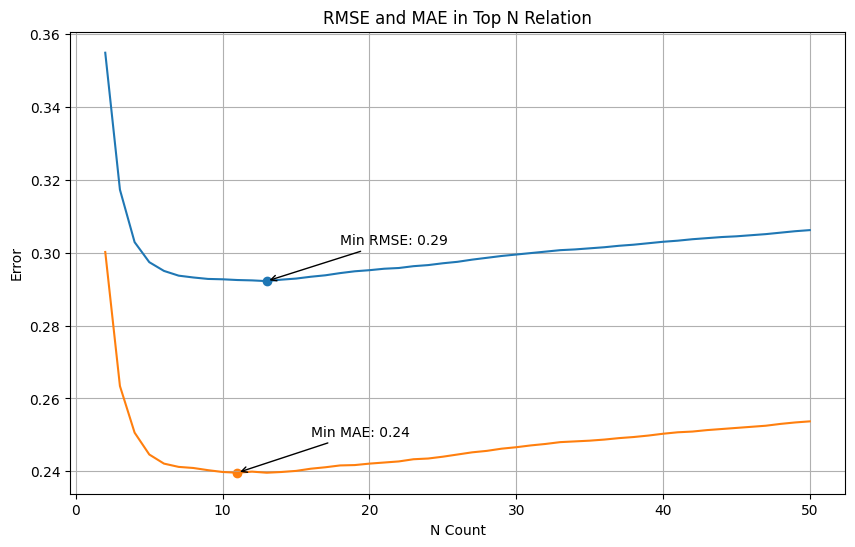

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sample_arr1, rmse_item_cs, label='RMSE')
plt.plot(sample_arr1, mae_item_cs, label='MAE')
plt.scatter(sample_arr1[min_rmse_index], rmse_item_cs[min_rmse_index], marker='o', label='Min RMSE')
plt.scatter(sample_arr1[min_mae_index], mae_item_cs[min_mae_index], marker='o', label='Min MAE')

plt.annotate(f'Min RMSE: {rmse_item_cs[min_rmse_index]:.2f}',
             xy=(sample_arr1[min_rmse_index], rmse_item_cs[min_rmse_index]),
             xytext=(sample_arr1[min_rmse_index] + 5, rmse_item_cs[min_rmse_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'Min MAE: {mae_item_cs[min_mae_index]:.2f}',
             xy=(sample_arr1[min_mae_index], mae_item_cs[min_mae_index]),
             xytext=(sample_arr1[min_mae_index] + 5, mae_item_cs[min_mae_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('N Count')
plt.ylabel('Error')
plt.title('RMSE and MAE in Top N Relation')
plt.grid(True)
plt.show()

## ***PREDICT RATING***

In [ ]:
n = 9
df_pred_ib = df_transposed.copy()

# prediksi
for i in range(len(df_pred_ib)):
    # similarity
    for j in range(len(sim_item_cs)):
        # memeriksa apakah nilai sama dengan 0
        if (df_pred_ib[sim_item_cs.index[j]][i] == 0):

            numerator = 0
            denominator = 0

            tmp = top_n(n, sim_item_cs, sim_item_cs.index[j])
            for k in range(len(tmp)):
                if tmp.index[k] != sim_item_cs.index[j]:

                    numerator += ((item_based_df[tmp.index[k]][i]) * tmp.iloc[k])
                    denominator += tmp.iloc[k]

            if denominator != 0 :
                # update nilai prediksi
                df_pred_ib[sim_item_cs.index[j]][i] = average(df_transposed, sim_item_cs.index[j]) + (numerator/denominator)
df_pred_ib

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000,0.530000,0.367171,-0.390000,-0.248000,-0.340000,0.470000,-0.500000,0.230000,0.082456,...,-0.380000,-0.390000,-0.556000,-0.360000,0.130000,-0.310000,0.261927,-0.540000,0.270000,-0.520000
bicaraboxoffice,0.000,0.160000,-0.670000,0.070000,-0.240000,0.113871,0.232108,-0.458000,0.254745,-0.150000,...,-0.340000,0.040000,-0.476000,0.017509,0.274435,0.099395,0.247398,0.129333,0.227741,0.276287
WatchmenID,0.000,-0.190000,0.239912,0.296235,0.570000,0.272380,0.268133,0.380000,0.228787,0.144772,...,0.490000,0.470000,0.288804,0.326059,-0.170000,0.234667,0.220947,0.510192,-0.410000,0.320000
ErikDavis,0.000,0.160000,0.290000,0.210000,-0.210000,0.180000,0.180000,0.420000,0.260000,0.120000,...,0.192408,-0.310000,0.275585,0.196588,0.300000,0.530000,0.200000,-0.080000,0.250000,0.250868
arulfittron,-0.340,0.150011,0.387632,0.438000,-0.200000,0.226325,-0.248000,0.165700,0.286957,-0.110000,...,0.133042,0.222775,0.216666,0.165477,0.320000,0.156299,0.302397,0.293533,0.329627,-0.440000
GilaFilmID,-0.270,0.203415,0.280000,0.570000,0.608000,0.277852,0.139992,-0.340000,0.340000,0.330000,...,-0.280000,0.198000,0.380000,0.510000,0.420792,0.225122,0.440000,0.221420,-0.308000,-0.004000
TarizSolis,0.590,0.676000,0.400000,0.264122,0.220000,0.223557,0.127698,0.490000,0.430000,0.370000,...,0.550000,0.233561,0.450000,0.166903,0.392906,0.173573,-0.300000,0.397789,0.222518,0.440000
djaycoholyc,0.000,0.140610,0.498000,-0.190000,-0.170000,0.140000,0.262415,0.530000,-0.290000,-0.010000,...,0.204588,-0.260000,0.500000,0.308649,0.390000,0.164440,0.550000,0.541772,0.315081,0.480000
akstanwyck,0.000,0.160000,0.290000,0.210000,-0.150000,0.180000,0.181108,-0.250000,0.296993,0.159661,...,0.184516,0.552000,0.270000,0.257444,0.300000,-0.018000,0.201115,0.360000,0.250000,0.301096
slashfilm,0.000,0.160000,0.290000,0.210000,-0.140000,0.180000,0.180000,-0.220000,0.305085,0.137981,...,0.170000,-0.218000,0.244867,0.160354,0.300000,0.600000,0.200000,-0.390000,0.250000,0.215480


***SAVING DATAFRAME***

In [ ]:
df_pred_ib.to_excel("ResultCF_IB.xlsx")

In [ ]:
files.download("ResultCF_IB.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ***EVALUATION***

In [ ]:
df_actualib = df_transposed.copy()
df_predib = pd.read_excel("ResultCF_IB.xlsx")
df_predib.rename(columns={'Unnamed: 0': 'nama film'}, inplace=True)

df_actual_values = df_actualib.to_numpy()
df_pred_values = df_predib.drop(columns='nama film').to_numpy()

y_actualib = df_actual_values.flatten()
y_predib = df_pred_values.flatten()

In [ ]:
MAE_ib = mean_absolute_error(y_actualib, y_predib)
MSE_ib = mean_squared_error(y_actualib, y_predib)
rmse_cbf_ib = math.sqrt(MSE_ib)

print("Mean Absolute Error (MAE):", MAE_ib)
print("Root Mean Square Error (RMSE):", rmse_cbf_ib)

Mean Absolute Error (MAE): 0.17126417275670824
Root Mean Square Error (RMSE): 0.21492110287494331
